In [1]:
#importing used libraries
import csv
import re
from functools import reduce
import numpy as np
import pandas as pd
from functools import reduce
from math import sqrt

# this aux function reads the CSV file and returns the data in a Python dictionary
def get_data_csv():
    collection = []
    bad_data = []
    with open('googleplaystore.csv', 'r', encoding='utf-8') as f:
        for line in csv.DictReader(f):
            try:
                has_none = False
                for key,value in line.items():
                    if value == None:
                        raise Exception('')
                # the following steps are the cleaning process for the dataset 
                line['Rating'] = float(line['Rating'])

                line['Reviews'] = int(line['Reviews'])
                # we convert the 'Rating' column from str to float 
                # and convert 'Reviews' column from str to int

                size_unit = line['Size'][-1]
                mutiplier = 1
               
                
                if size_unit.upper() == 'M':
                    mutiplier = 1024 * 1024
                elif size_unit.upper() == 'K':
                    mutiplier = 1024
                # there are 'k' and ' M' in 'Size' coumn, beacause this
                # is the size of an software, then we convert 
                # 'k' to '*1024' and 'M' to '1024'
                else:
                    line['Size'] = '-1s'
                line['Size'] = float(line['Size'][:-1]) * mutiplier 

                line['Installs'] = int(line['Installs'][:-1].replace(',', ''))
                # there is '+' at the end of data in 'Installs' column, 
                # we convert 'number+' to 'number * 1'
                
                if line['Price'] == '0':
                    line['Price'] = 0
                else:
                    line['Price'] = float(line['Price'][1:])
                # we change the data type in 'Price' column from str to int
                collection.append(line)
            except:
                bad_data.append(line)
                # because there are some data have missing concept, then
                # we stored these missing data into  bad_data
        return collection,bad_data


#at last, we convert all the data to int or float and ignore bad data
#this is convenient for us to calculate the following data 


# do not run the plot code more than once 
# if the code is run more than once, the size of each content label
# will explode, if this situation happened, restart the kernel
# we didn't know what's wrong with this situation 
    
    
# the data
data, bad_data = get_data_csv()
print(len(data))
print(len(bad_data))
print(type(data))

10839
2
<class 'list'>


In [2]:
data_frame = pd.read_csv("googleplaystore.csv")
data_frame.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
#Q1
review_count = {}
for app in data:
    category = app['Category']
    reviews = app['Reviews']
    if category in review_count:
        review_count[category] += reviews
    else:
        review_count[category] = reviews
# this is used to find the category with the highest reviews

print(review_count)
max_review_category = max(review_count, key=review_count.get)

print(max_review_category)

{'ART_AND_DESIGN': 1714440, 'AUTO_AND_VEHICLES': 1163666, 'BEAUTY': 396240, 'BOOKS_AND_REFERENCE': 21959069, 'BUSINESS': 13954552, 'COMICS': 3383276, 'COMMUNICATION': 815462260, 'DATING': 7291278, 'EDUCATION': 39595786, 'ENTERTAINMENT': 59178154, 'EVENTS': 161018, 'FINANCE': 17550728, 'FOOD_AND_DRINK': 8883330, 'HEALTH_AND_FITNESS': 37893743, 'HOUSE_AND_HOME': 3976385, 'LIBRARIES_AND_DEMO': 1037118, 'LIFESTYLE': 12882784, 'GAME': 1585422349, 'FAMILY': 410226330, 'MEDICAL': 1585975, 'SOCIAL': 621241422, 'SHOPPING': 115041222, 'PHOTOGRAPHY': 213516650, 'SPORTS': 70830169, 'TRAVEL_AND_LOCAL': 62617919, 'TOOLS': 273185044, 'PERSONALIZATION': 89346140, 'PRODUCTIVITY': 114116975, 'PARENTING': 958331, 'WEATHER': 14604735, 'VIDEO_PLAYERS': 110380188, 'NEWS_AND_MAGAZINES': 54400863, 'MAPS_AND_NAVIGATION': 30659254}
GAME


<AxesSubplot:xlabel='Category'>

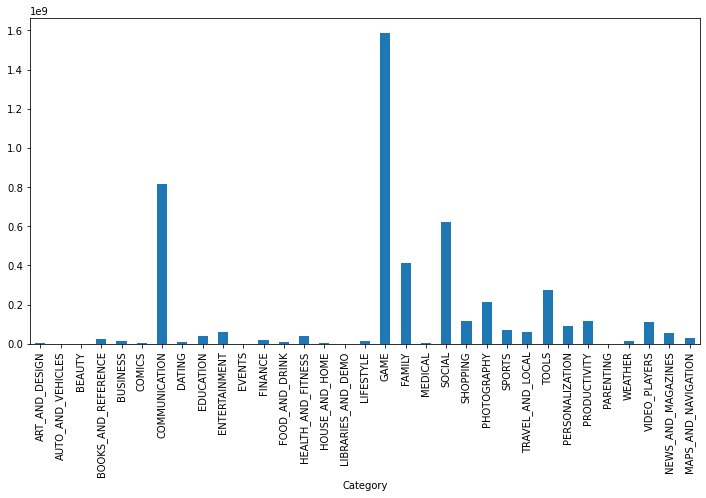

In [4]:
#The plot for different categories and their own number of reviews
import matplotlib.pyplot as plt
import seaborn as sns



df1 = pd.Series(review_count)


df1.index.name = 'Category'

df1
df1.plot(kind='bar', figsize=(12,6), x="Category")

# the y-axis is the number of reviews, and  x-axis is the types of application

In [11]:
#This cell is calculating some basic data for "Reviews", "Installs", "Price" and
#"Rating" columns

review_mean = np.mean(list(map(lambda x: x["Reviews"], data)))
installs_mean = np.mean(list(map(lambda x: x["Installs"], data)))
price_mean = np.mean(list(map(lambda x: x["Price"], data)))




review_std = np.std(list(map(lambda x: x["Reviews"], data)))
installs_std = np.std(list(map(lambda x: x["Installs"], data)))
price_std =np.std(list(map(lambda x: x["Price"], data)))

print(review_mean)
print(installs_mean)
print(price_mean)

print(review_std)
print(installs_std)
print(price_std)

data_rating = list(filter(lambda x: not np.isnan(x), list(map(lambda x: x["Rating"], data))))
 # there are 'nan' strings in the 'Rating' column, this step will ignore 'nan'
    
ratings_mean = np.mean(data_rating)
ratings_std = np.std(data_rating)
print(ratings_mean)
print(ratings_std)

444193.87332779774
15465765.613709752
1.0274628655780056
2927757.4953881954
85029231.64318666
15.949700416428426
4.191757420456972
0.5151913531399045


In [6]:
#Q2
from scipy.stats import pearsonr

# correlation of reviews  and installs
corr, _ = pearsonr(list(map(lambda j: j["Reviews"], data)), list(map(lambda j: j["Installs"], data)))
print('Pearsons correlation: %3f' % corr)

Pearsons correlation: 0.643121


In [7]:
#Q3 free app

price_rating = list(map(lambda x: (x["Price"], x["Content Rating"]), data))

free_app = list(filter(lambda x: x[0] == 0,price_rating))

# this step is finding the apps without payment from dataset

count_dict_free = {}
for app in free_app:
    count_dict_free[app[1]] = 0
for app in free_app:
    count_dict_free[app[1]] += 1   
    
# this step is finding out how many times each types of content rating appears

df_free_app = pd.Series(count_dict_free)

df_free_app


Everyone           8019
Teen               1156
Everyone 10+        380
Mature 17+          479
Adults only 18+       3
Unrated               2
dtype: int64

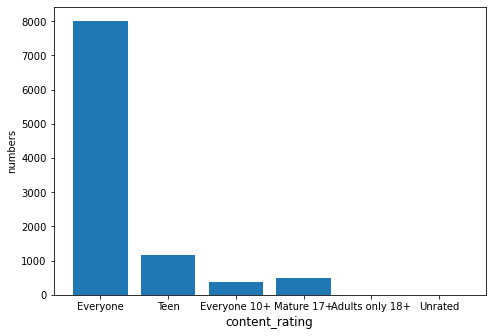

In [8]:
#Q3 free app plot
import matplotlib.pyplot as plt
import matplotlib 

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
content_rating = ['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+', 'Adults only 18+','Unrated']
numbers = [8019,1156,380,479,3,2]
ax.bar(content_rating,numbers)

ax.set_xlabel('content_rating', fontsize = 12)
ax.set_ylabel('numbers', fontsize = 10)
plt.show()

In [9]:
#Q3 not free app

paid_app = list(filter(lambda x: x[0] > 0,price_rating))

# this step is finding the apps that need payment from dataset

count_dict_paid = {}
for app in paid_app:
    count_dict_paid[app[1]] = 0
for app in paid_app:
    count_dict_paid[app[1]] += 1        

# this step is finding out how many times each types of content rating appears
    
df_paid_app = pd.Series(count_dict_paid)

df_paid_app


Everyone        695
Mature 17+       20
Teen             52
Everyone 10+     33
dtype: int64

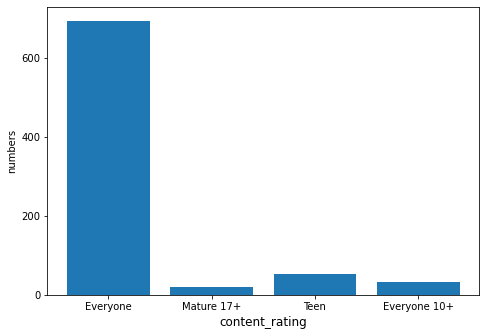

In [10]:
#Q3 not free app plot
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
content_rating = ['Everyone', 'Mature 17+', 'Teen', 'Everyone 10+']
numbers = [695,20,52,33]
ax.bar(content_rating,numbers)
matplotlib.rc('xtick', labelsize=200) 
matplotlib.rc('ytick', labelsize=20) 
ax.set_xlabel('content_rating', fontsize = 12)
ax.set_ylabel('numbers', fontsize = 10)
plt.show()